Data exploration
=============

this notebook is here to visualize and look into the data. be sure to run `./fetch` in root directory to fetch the data

In [1]:
import geopandas
import pandas as pd
%cd ../data
data_original = pd.read_csv('liiklusjarelevalve_2.csv',  delimiter='\t', header=0)

/home/krister/Desktop/IDS_PROJECT/ids2019-m16-traffic-violations/data


In [2]:
data_original.head()

,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,Seadus,Paragrahv,ParagrahvTais,Loige,Punkt,RikutudOigusnorm,...,Lest_X,Lest_Y,SoidukLiik,SoidukRegRiik,SoidukMark,SoidukVlAasta,RikkujaSugu,RikkujaVanus,RikkujaElukoht,SyyteoLiik
0,eddc9c3a-875c-18d6-88da-f35e113740d1,2018-12-31,23:15,Esmaspäev,Karistusseadustik,§ 424.,§ 424. Mootorsõiduki ja trammi juhtimine joobe...,lg. 1.,,NaN,...,6533500-6533999,592500-592999,NaN,NaN,NaN,NaN,M,26-34,NaN,KT
1,84464ff8-716f-18d6-8851-bde91eaa16c8,2018-12-31,22:45,Esmaspäev,Liiklusseadus,§ 201.,"§ 201. Mootorsõiduki, maastikusõiduki või tram...",lg. 2.,,"LS § 90 lg. 1 p. 1,3",...,6591000-6591499,548500-548999,SOIDUAUTO,EST,MITSUBISHI,2000,M,18-25,NaN,VT
2,84464dd2-716f-18d6-8851-bde91eaa16c8,2018-12-31,22:41,Esmaspäev,Karistusseadustik,§ 424.,§ 424. Mootorsõiduki ja trammi juhtimine joobe...,lg. 1.,,NaN,...,6603000-6603499,545000-545499,SOIDUAUTO,EST,RENAULT,2006,M,65-,NaN,KT
3,ace8f086-79f9-18d6-88da-f35e113740d1,2018-12-31,22:17,Esmaspäev,Liiklusseadus,§ 227.,§ 227. Mootorsõidukijuhi poolt lubatud sõiduki...,lg. 2.,,LS § 15 lg. 1 p. 2,...,6472000-6472499,660000-660499,SOIDUAUTO,EST,ŠKODA,2017,M,55-64,NaN,VT
4,84464dbe-716f-18d6-8851-bde91eaa16c8,2018-12-31,22:00,Esmaspäev,Karistusseadustik,§ 424.,§ 424. Mootorsõiduki ja trammi juhtimine joobe...,lg. 1.,,NaN,...,6443500-6443999,567500-567999,SOIDUAUTO,EST,VOLKSWAGEN,2004,M,26-34,NaN,KT


468369 rows... over 1.3 million people over 5 yrs

In [3]:
data_original.shape[0]

468383

**full paragraphs**: there's a lot of them:

In [4]:
data_original['ParagrahvTais'].unique()

array(['§ 424. Mootorsõiduki ja trammi juhtimine joobeseisundis',
       '§ 201. Mootorsõiduki, maastikusõiduki või trammi juhtimine juhtimisõiguseta isiku poolt',
       '§ 227. Mootorsõidukijuhi poolt lubatud sõidukiiruse ületamine',
       '§ 221. Juhi poolt ristmikule või jalakäijate ülekäigurajale sõitmine foori keelava tule ajal',
       '§ 242. Mootorsõiduki- või trammijuhi poolt liiklusnõuete muu rikkumine',
       "§ 423'1. Mootorsõiduki, maastikusõiduki või trammi juhtimise eest vastava kategooria mootorsõiduki või trammi juhtimisõiguseta isiku poolt, kui see on toime pandud süstemaatiliselt, – karist",
       '§ 234. Sõiduki peatamise märguande eiramine',
       '§ 237. Liiklusõnnetuse sündmuskohalt põgenemine või liiklusõnnetuses kannatada saanud abitus seisundis oleva inimese abita jätmine',
       '§ 207. Tehnonõuetele vastavuse kontrolli mitteläbinud mootorsõiduki või trammi juhtimine',
       '§ 224. Mootorsõiduki, maastikusõiduki või trammi juhtimine lubatud alkoholi p

**vehicle brands**: lots of fun stuff as "Berlingo", "MERDSEDES BENZ", "MITSUBISCHI", "AKURA", "roller"

In [5]:
data_original['SoidukMark'].unique()

array([nan, 'MITSUBISHI', 'RENAULT', 'ŠKODA', 'VOLKSWAGEN', 'TOYOTA',
       'CHRYSLER', 'VOLVO', 'JEEP', 'FORD', 'AUDI', 'MERCEDES-BENZ',
       'BMW', 'HYUNDAI', 'DAEWOO', 'KIA', 'CADILLAC', 'ALFA ROMEO',
       'MAZDA', 'OPEL', 'SKODA', 'MERCEDES BENZ', 'LEXUS', 'SUBARU',
       'CITROEN', 'HONDA', 'MINI', 'NISSAN', 'FIAT', 'SAAB',
       'ROMET MOTORS                    ', 'CHEVROLET', 'PORSCHE', 'SEAT',
       'IVECO', 'ISUZU', 'DACIA', 'PEUGEOT', 'LAND ROVER', 'AIXAM',
       'LANCIA', 'SUZUKI', 'SCANIA', 'LADA', 'JAGUAR', 'ROMET MOTORS',
       'MAN', 'MICROCAR                        ',
       '                                ', 'ROVER', 'DODGE', 'POLARIS',
       'SSANGYONG', 'CAN-AM', 'INFINITI', 'LOHR', 'YAMAHA', 'APRILIA',
       'SISU', 'VW                              ', 'VW',
       'MB                              ', 'DAF',
       'LAND ROVER                      ', 'MAN/MAN TRUCK', 'FAUN',
       'KYMCO', 'IVECO DAILY', 'MERCEDES',
       'BK                            

**car years**: 'VANA'

In [6]:
data_original['SoidukVlAasta'].unique()

array([nan, '2000', '2006', '2017', '2004', '2012', '2007', '2008',
       '2018', '1998', '2016', '1996', '2001', '1999', '2002', '2011',
       '2013', '2009', '2014', '2005', '2003', '2010', '    ', '1994',
       '2015', '1988', '1991', '1992', '1997', '1995', '1989', '1982',
       '1993', '1987', '1990', '1986', '1985', '1983', 'VANA', '1984',
       '1980', '1979', '1981', '1978', '1977', '1976', '1975'],
      dtype=object)

**all infractions done by ferraris**: all of them are speeding :D :D

In [7]:
data_original[data_original.SoidukMark == 'FERRARI']

,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,Seadus,Paragrahv,ParagrahvTais,Loige,Punkt,RikutudOigusnorm,...,Lest_X,Lest_Y,SoidukLiik,SoidukRegRiik,SoidukMark,SoidukVlAasta,RikkujaSugu,RikkujaVanus,RikkujaElukoht,SyyteoLiik
127193,96645eb8-1636-18d5-8326-a9a756483dba,2017-05-11,10:23,Neljapäev,Liiklusseadus,§ 227.,§ 227. Mootorsõidukijuhi poolt lubatud sõiduki...,lg. 2.,,LS § 15 lg. 1 p. 2,...,6583000-6583499,538000-538499,SOIDUAUTO,MUU,FERRARI,NaN,N,26-34,NaN,VT
196183,9654dae2-1636-18d5-8326-a9a756483dba,2016-08-14,20:01,Pühapäev,Liiklusseadus,§ 227.,§ 227. Mootorsõidukijuhi poolt lubatud sõiduki...,lg. 3.,,LS § 15 lg. 1 p. 2,...,6585500-6585999,537500-537999,SOIDUAUTO,MUU,FERRARI,NaN,M,26-34,NaN,VT
196184,9654dae2-1636-18d5-8326-a9a756483dba,2016-08-14,20:01,Pühapäev,Liiklusseadus,§ 227.,§ 227. Mootorsõidukijuhi poolt lubatud sõiduki...,lg. 3.,,LS § 15 lg. 1 p. 2,...,6585500-6585999,537500-537999,SOIDUAUTO,MUU,FERRARI,NaN,M,26-34,NaN,VT
215087,9650a5d0-1636-18d5-8326-a9a756483dba,2016-06-10,14:57,Reede,Liiklusseadus,§ 227.,§ 227. Mootorsõidukijuhi poolt lubatud sõiduki...,lg. 2.,,LS § 15 lg. 1 p. 1,...,6510000-6510499,524500-524999,TUNDMATU,MUU,FERRARI,2002,M,35-44,NaN,VT
311682,963b1f80-1636-18d5-8326-a9a756483dba,2015-07-04,10:44,Laupäev,Liiklusseadus,§ 227.,§ 227. Mootorsõidukijuhi poolt lubatud sõiduki...,lg. 2.,,LS § 15 lg. 1 p. 1,...,6424000-6424499,526000-526499,SOIDUAUTO,MUU,FERRARI,NaN,M,55-64,NaN,VT
408510,96259430-1636-18d5-8326-a9a756483dba,2014-07-24,01:00,Neljapäev,Liiklusseadus,§ 227.,§ 227. Mootorsõidukijuhi poolt lubatud sõiduki...,lg. 4.,,LS § 15 lg. 1 p. 1,...,6427000-6427499,527000-527499,SOIDUAUTO,MUU,FERRARI,NaN,M,35-44,NaN,VT


Interesting facts RAW

In [8]:
data_original["RikkujaSugu"].value_counts()

M    384399
N     76105
       5004
Name: RikkujaSugu, dtype: int64

In [9]:
data_original["ToimNadalapaev"].value_counts()

Kolmapäev     71431
Teisipäev     69539
Neljapäev     69443
Reede         68055
Laupäev       66377
Esmaspäev     62203
Pühapäev      61335
Name: ToimNadalapaev, dtype: int64

In [10]:
data_original["RikkujaVanus"].value_counts()

26-34    115057
35-44    108544
45-54     85302
18-25     77984
55-64     54675
65-       17075
16-17      4414
13-15      2435
0-12          8
Name: RikkujaVanus, dtype: int64

In [11]:
data_original.loc[data_original['RikkujaVanus'] == "0-12 "]

,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,Seadus,Paragrahv,ParagrahvTais,Loige,Punkt,RikutudOigusnorm,...,Lest_X,Lest_Y,SoidukLiik,SoidukRegRiik,SoidukMark,SoidukVlAasta,RikkujaSugu,RikkujaVanus,RikkujaElukoht,SyyteoLiik
103242,9669ce34-1636-18d5-8326-a9a756483dba,2017-08-16,16:55,Kolmapäev,Liiklusseadus,§ 207.,§ 207. Tehnonõuetele vastavuse kontrolli mitte...,NaN,,LS § 73 lg. 2,...,6393500-6393999,701000-701499,TUNDMATU,EST,MERCEDES-BENZ,2000,M,0-12,NaN,VT
113694,966758fc-1636-18d5-8326-a9a756483dba,2017-07-08,11:25,Laupäev,Liiklusseadus,§ 228.,"§ 228. Mootorsõiduki juhtimise eest, milles as...",NaN,,LS § 73 lg. 8,...,6393500-6393999,701000-701499,SOIDUAUTO,MUU,MERCEDES BENZ,NaN,M,0-12,NaN,VT
321502,96390ad8-1636-18d5-8326-a9a756483dba,2015-05-30,13:55,Laupäev,Liiklusseadus,§ 259.,"§ 259. Jalakäija, tasakaaluliikuri juhi, jalgr...",lg. 2.,p. 3.,LS § 31 lg. 1; § 2 p. 100; § 14 lg. 7,...,6590000-6590499,737500-737999,JALGRATAS,EST,NaN,,M,0-12,NaN,VT
326771,96379cb6-1636-18d5-8326-a9a756483dba,2015-05-11,14:37,Esmaspäev,Liiklusseadus,§ 259.,"§ 259. Jalakäija, tasakaaluliikuri juhi, jalgr...",lg. 2.,p. 3.,LS § 33 lg. 2 p. 8,...,6581500-6581999,694500-694999,JALGRATAS,EST,NaN,,,0-12,NaN,VT
402264,9626d02a-1636-18d5-8326-a9a756483dba,2014-08-18,19:49,Esmaspäev,Liiklusseadus,§ 259.,"§ 259. Jalakäija, tasakaaluliikuri juhi, jalgr...",lg. 2.,p. 3.,NaN,...,6438000-6438499,646500-646999,SOIDUAUTO,EST,VAZ,1990,N,0-12,NaN,VT
402265,9626d02a-1636-18d5-8326-a9a756483dba,2014-08-18,19:49,Esmaspäev,Liiklusseadus,§ 259.,"§ 259. Jalakäija, tasakaaluliikuri juhi, jalgr...",lg. 2.,p. 2.,NaN,...,6438000-6438499,646500-646999,SOIDUAUTO,EST,VAZ,1990,N,0-12,NaN,VT
412277,9624c9f6-1636-18d5-8326-a9a756483dba,2014-07-11,20:05,Reede,Liiklusseadus,§ 259.,"§ 259. Jalakäija, tasakaaluliikuri juhi, jalgr...",lg. 2.,p. 3.,LS § 24 lg. 1,...,6526500-6526999,670000-670499,SOIDUAUTO,EST,PEUGEOT,2013,M,0-12,NaN,VT
412681,9624b9a2-1636-18d5-8326-a9a756483dba,2014-07-10,10:30,Neljapäev,Liiklusseadus,§ 239.,§ 239. Turvavarustuse nõuetekohaselt kinnitama...,lg. 1.,p. 2.,LS § 30 lg. 1,...,6405500-6405999,620500-620999,SOIDUAUTO,EST,NISSAN,NaN,N,0-12,NaN,VT


In [12]:
data_original["SoidukMark"].value_counts()

VOLKSWAGEN                                                                                                                          50050
BMW                                                                                                                                 40392
AUDI                                                                                                                                38316
MERCEDES-BENZ                                                                                                                       31582
VOLVO                                                                                                                               26836
                                                                                                                                    ...  
honda                                                                                                                                   1
TIMBER                            

In [13]:
kellaajad = data_original["ToimKell"]
sõnastik = {}
for kell in kellaajad:
    tund = str(kell).split(":")[0]
    if tund in sõnastik:
        sõnastik[tund] = sõnastik.get(tund) + 1
    else:
        sõnastik[tund] = 1;
print(sõnastik)

sõnastikDF = pd.DataFrame.from_dict(sõnastik, orient="index")
sõnastikDF.sort_values(by=[0])

{'23': 13295, '22': 16572, '21': 18265, '20': 13242, '19': 12001, '18': 22391, '17': 33381, '16': 36159, '15': 36192, '14': 34093, '13': 27838, '12': 27803, '11': 37481, '10': 39126, '09': 30723, '08': 16339, '07': 6987, '05': 4583, '02': 6039, '01': 8342, '00': 12476, '04': 3883, '03': 4465, '06': 5132, 'nan': 1575}


,0
nan,1575
04,3883
03,4465
05,4583
06,5132
02,6039
07,6987
01,8342
19,12001
00,12476


In [14]:
kuupäevad = data_original["ToimKpv"]
sõnastik = {}
for kuupäev in kuupäevad:
    kuu = str(kuupäev).split("-")[1]
    if kuu in sõnastik:
        sõnastik[kuu] = sõnastik.get(kuu) + 1
    else:
        sõnastik[kuu] = 1;
print(sõnastik)

sõnastik_kuuDF = pd.DataFrame.from_dict(sõnastik, orient="index")
sõnastik_kuuDF.sort_values(by=[0])

{'12': 31005, '11': 34563, '10': 39494, '09': 40015, '08': 41840, '07': 42234, '06': 37800, '05': 40687, '04': 41679, '03': 43389, '02': 38377, '01': 37300}


,0
12,31005
11,34563
01,37300
06,37800
02,38377
10,39494
09,40015
05,40687
04,41679
08,41840


In [15]:
meesteAutod = data_original.loc[data_original['RikkujaSugu'] == "M"]
naisteAutod = data_original.loc[data_original['RikkujaSugu'] == "N"]

meesteAutod["SoidukMark"].value_counts().head(10)

VOLKSWAGEN       42245
BMW              34557
AUDI             32173
MERCEDES-BENZ    27369
VOLVO            23092
FORD             20314
TOYOTA           19947
OPEL             13962
PEUGEOT          10492
SCANIA            9982
Name: SoidukMark, dtype: int64

In [16]:
naisteAutod["SoidukMark"].value_counts().head(10)

VOLKSWAGEN       7234
TOYOTA           5815
AUDI             5742
BMW              5327
MERCEDES-BENZ    3831
HONDA            3361
VOLVO            3299
FORD             3117
ŠKODA            2331
OPEL             2282
Name: SoidukMark, dtype: int64

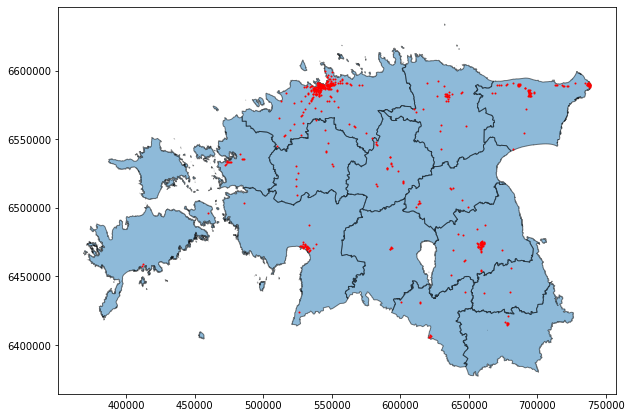

In [49]:
estonia = geopandas.read_file("../data/map/maakond_20191201.shp")
clean_data = pd.read_csv('../data/data_cleaned.csv',  delimiter=',', header=0)
coords = pd.crosstab(clean_data.x,clean_data.y).stack().reset_index().rename(columns={0:"frequency"})
coords = coords.sort_values(by="frequency", ascending=False)
coords = coords.head(500)

gdf = geopandas.GeoDataFrame(
    coords, geometry=geopandas.points_from_xy(coords.y, coords.x))


ax = estonia.plot(figsize=(10,10), alpha=0.5, edgecolor='k')

plot = gdf.plot(ax=ax, color='red', markersize=1)